### Corona Virus Analysis - 
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

In this notebook, its my attempt to analyse the daily level information on the corona virus affected countries and derive some insights out of this.

This data is extracted from kaggle - 
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [129]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#The parse_dates parameter make sure that the Last Update column is parsed as a date not a string.
df = pd.read_csv("2019_nCoV_data.csv",parse_dates=['Last Update'])
df.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null datetime64[ns]
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 23.9+ KB


In [22]:
df.describe()

,Sno,Confirmed,Deaths,Recovered
count,434.000000,434.000000,434.000000,434.000000
mean,217.500000,80.762673,1.847926,1.525346
std,125.429263,424.706068,15.302792,9.038054
min,1.000000,0.000000,0.000000,0.000000
25%,109.250000,2.000000,0.000000,0.000000
50%,217.500000,7.000000,0.000000,0.000000
75%,325.750000,36.000000,0.000000,0.000000
max,434.000000,5806.000000,204.000000,116.000000


In [23]:
df['dayofweek'] = df['Last Update'].dt.dayofweek  # add dow column
df['day'] = df['Last Update'].dt.day
#df['month'] = df['Last Update'].dt.month
df['hour'] = df['Last Update'].dt.hour

In [24]:
df.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,dayofweek,day,hour
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,2,22,12
1,2,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,2,22,12
2,3,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,2,22,12
3,4,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,2,22,12
4,5,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,2,22,12


### Lets see which countries are affected by corona virus

In [93]:
df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy'], dtype=object)

### Totally 27 countries are affected with this virus till date

In [94]:
len(df['Country'].unique())

27

### Lets see how many cases in India and in which State/Province

In [70]:
df[df['Country']=='India']

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,dayofweek,day,hour
432,433,NaN,India,2020-01-30 21:30:00,1.0,0.0,0.0,3,30,21


There is only one case reported in India on 30th and State/Province information is not availabe

In [95]:
df.day.unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

The data is collated since 22nd Jan, let see which are the countries which first reported this corona virus outbreak

In [102]:
df_first_report = df[df['day'] == df.day.min()].groupby('Country')[['Confirmed']].sum().reset_index()
df_first_report

,Country,Confirmed
0,China,549.0
1,Japan,2.0
2,South Korea,1.0
3,Thailand,2.0
4,US,1.0


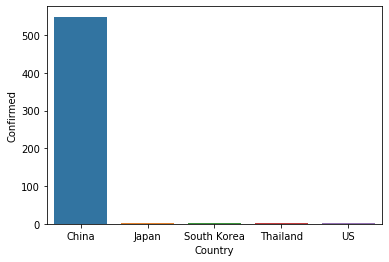

In [104]:
sns.barplot(x='Country',y='Confirmed',data=df_first_report)

### Lets now see confirmed, deaths and recovered cases by country

In [31]:
df.groupby('Country')[['Confirmed','Deaths','Recovered']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered
0,Australia,34.0,0.0,2.0
1,Brazil,0.0,0.0,0.0
2,Cambodia,4.0,0.0,0.0
3,Canada,10.0,0.0,0.0
4,China,549.0,0.0,0.0
5,Finland,2.0,0.0,0.0
6,France,25.0,0.0,0.0
7,Germany,13.0,0.0,0.0
8,Hong Kong,55.0,0.0,0.0
9,India,1.0,0.0,0.0


Mainland China is the most impacted with high number of confirmed cases and deaths. However, there are also cases who have recovered from this.

In [132]:
df_by_state = df.groupby(['Country','Province/State'])['Confirmed','Deaths','Recovered'].sum()
display(df_by_state)

Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales        16.0     0.0        2.0
               Queensland              4.0     0.0        0.0
               Victoria                6.0     0.0        0.0
Canada         British Columbia        3.0     0.0        0.0
               Ontario                 7.0     0.0        0.0
China          Anhui                   1.0     0.0        0.0
               Beijing                14.0     0.0        0.0
               Chongqing               6.0     0.0        0.0
               Fujian                  1.0     0.0        0.0
               Gansu                   0.0     0.0        0.0
               Guangdong              26.0     0.0        0.0
               Guangxi                 2.0     0.0        0.0
               Guizhou                 1.0     0.0        0.0
               Hainan                  4.0     0.0        0.0
               Hebei                   1.0     0.0        0.0
               Heilongjiang            0.0     0.0        0.0
               Henan                   5.0     0.0        0.0
               Hong Kong               0.0     0.0        0.0
               Hubei                 444.0     0.0        0.0
               Hunan                   4.0     0.0        0.0
               Inner Mongolia          0.0     0.0        0.0
               Jiangsu                 1.0     0.0        0.0
               Jiangxi                 2.0     0.0        0.0
               Jilin                   0.0     0.0        0.0
               Liaoning                2.0     0.0        0.0
               Macau                   1.0     0.0        0.0
               Ningxia                 1.0     0.0        0.0
               Qinghai                 0.0     0.0        0.0
               Shaanxi                 0.0     0.0        0.0
               Shandong                2.0     0.0        0.0
               Shanghai                9.0     0.0        0.0
               Shanxi                  1.0     0.0        0.0
               Sichuan                 5.0     0.0        0.0
               Taiwan                  1.0     0.0        0.0
               Tianjin                 4.0     0.0        0.0
               Tibet                   0.0     0.0        0.0
               Xinjiang                0.0     0.0        0.0
               Yunnan                  1.0     0.0        0.0
               Zhejiang               10.0     0.0        0.0
Germany        Bavaria                13.0     0.0        0.0
Hong Kong      Hong Kong              55.0     0.0        0.0
Macau          Macau                  39.0     0.0        0.0
Mainland China Anhui                 849.0     0.0        5.0
               Beijing               580.0     4.0       20.0
               Chongqing             871.0     0.0        3.0
               Fujian                411.0     1.0        0.0
               Gansu                 123.0     0.0        0.0
               Guangdong            1425.0     0.0       34.0
               Guangxi               381.0     0.0        6.0
               Guizhou                63.0     0.0        2.0
               Hainan                223.0     4.0        1.0
               Hebei                 262.0     8.0        0.0
               Heilongjiang          211.0     7.0        0.0
               Henan                1229.0     9.0        6.0
               Hubei               20128.0   760.0      478.0
               Hunan                1132.0     0.0        2.0
               Inner Mongolia         82.0     0.0        0.0
               Jiangsu               558.0     0.0        7.0
               Jiangxi               692.0     0.0       16.0
               Jilin                  57.0     0.0        2.0
               Liaoning              196.0     0.0        2.0
               Ningxia                63.0     0.0        1.0
               Qinghai                31.0     0.0        0.0
   

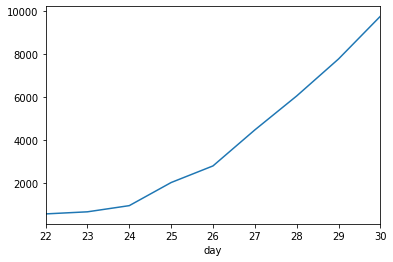

In [40]:
df.groupby('day').sum()['Confirmed'].plot()

In [43]:
df.groupby('day')['Confirmed'].sum()

day
22     555.0
23     653.0
24     941.0
25    2019.0
26    2794.0
27    4473.0
28    6057.0
29    7783.0
30    9776.0
Name: Confirmed, dtype: float64

### There is a exponential raise in the victims of coronavirus with time

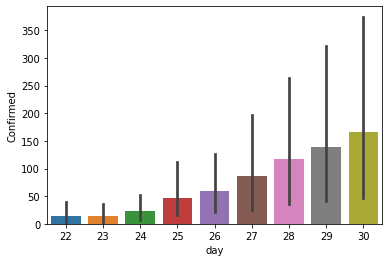

In [47]:
sns.barplot(x='day',y='Confirmed',data=df)

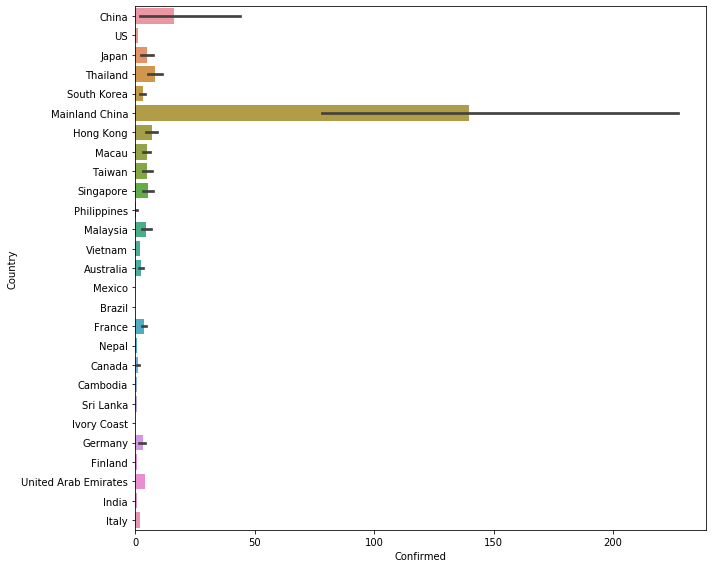

In [69]:
plt.figure(figsize=(10,8))
#df_by_country = df.groupby('Country')[['Confirmed','Deaths','Recovered']].sum().reset_index()
sns.barplot(x='Confirmed',y='Country',data=df,orient="h")
plt.tight_layout()


In [57]:
df_by_country.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,34.0,0.0,2.0
1,Brazil,0.0,0.0,0.0
2,Cambodia,4.0,0.0,0.0
3,Canada,10.0,0.0,0.0
4,China,549.0,0.0,0.0


<Figure size 1440x864 with 0 Axes>

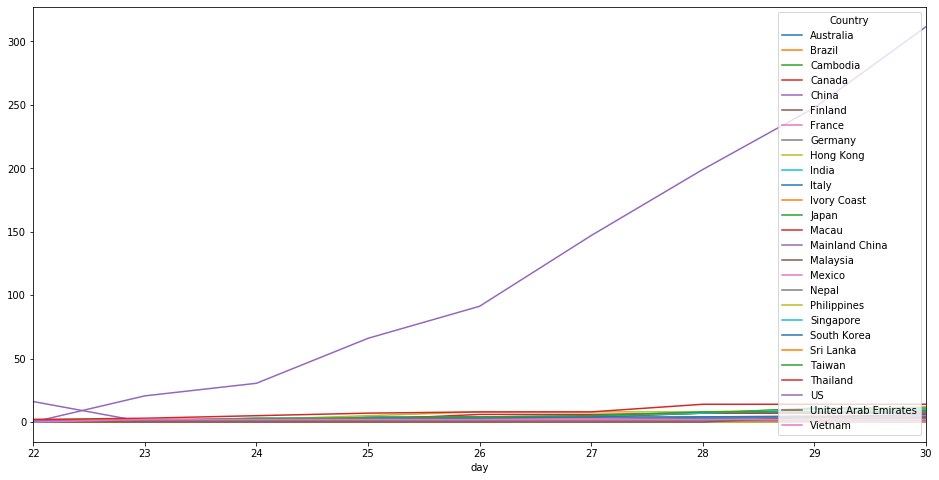

In [80]:
pd.pivot_table(df,values='Confirmed',columns='Country',index='day').fillna(0).plot(figsize=(16,8))

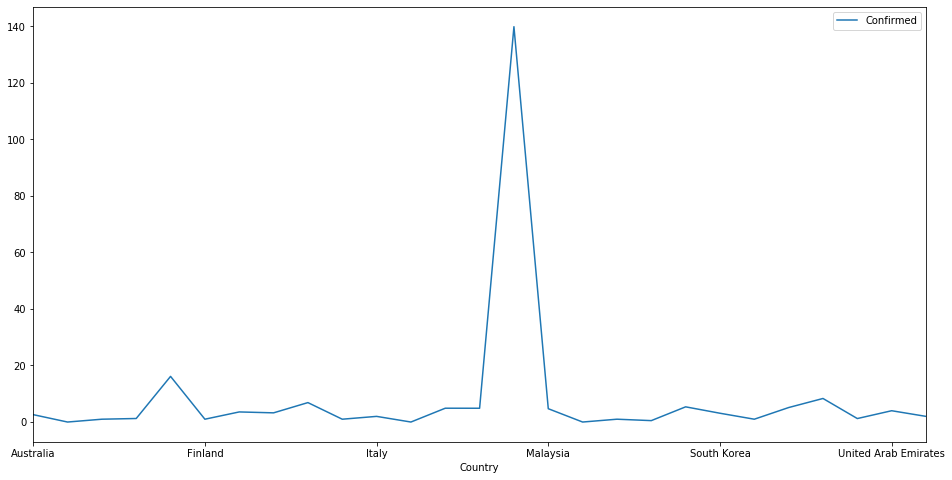

In [81]:
pd.pivot_table(df,values='Confirmed',index='Country').fillna(0).plot(figsize=(16,8))

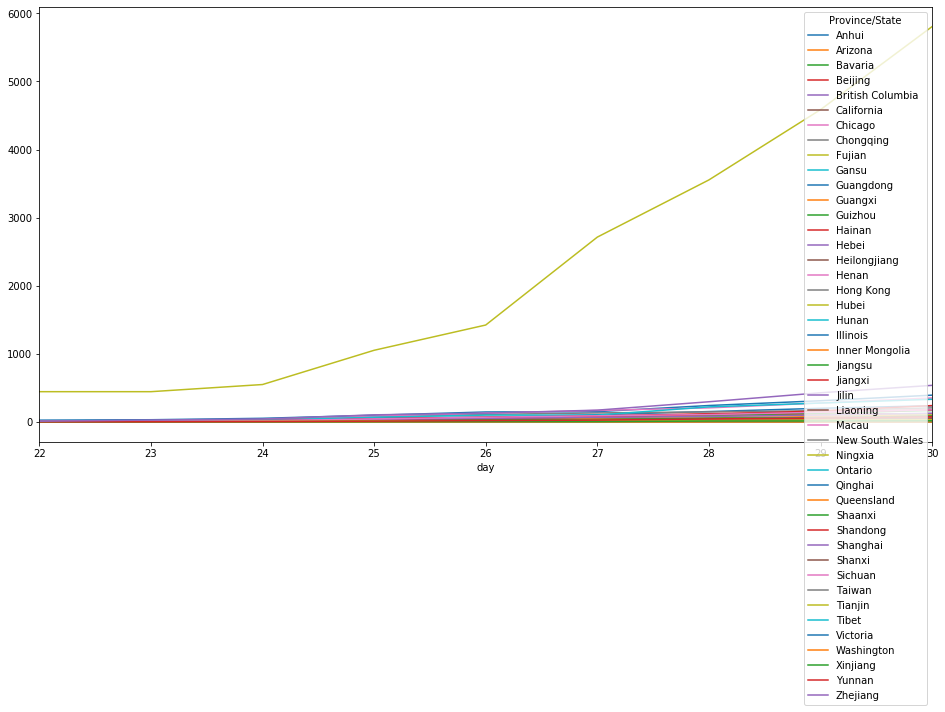

In [82]:
pd.pivot_table(df,values='Confirmed',columns='Province/State',index='day').fillna(0).plot(figsize=(16,8))

### Lets look at only cases from China and Mainland China

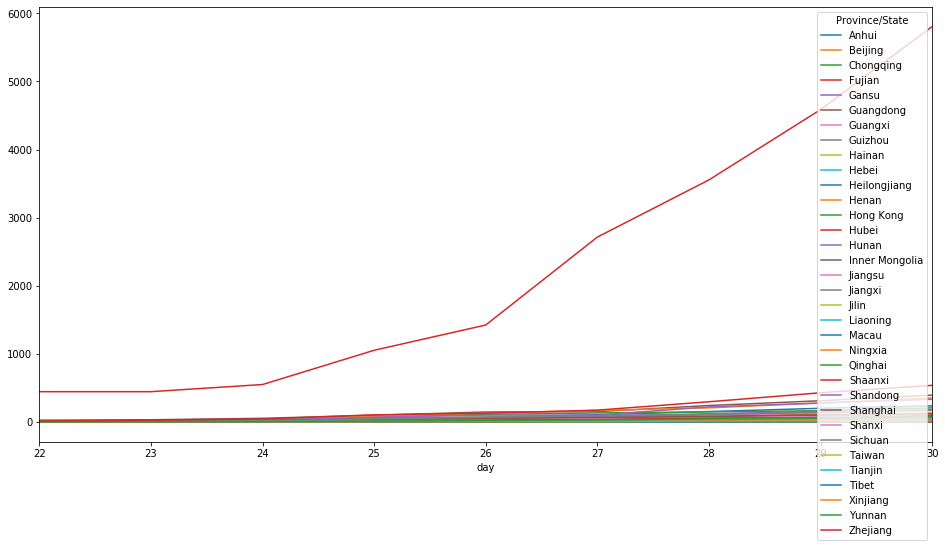

In [86]:
df_china = df[df['Country'].str.contains('china', case = False)]
pd.pivot_table(df_china,values='Confirmed',columns='Province/State',index='day').fillna(0).plot(figsize=(16,8))

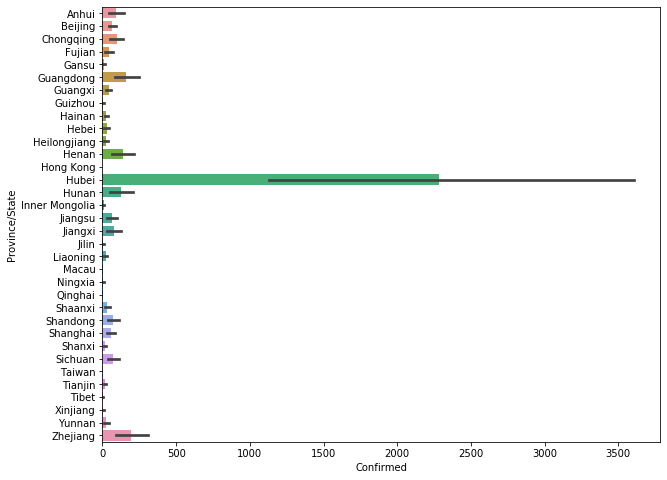

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(x='Confirmed',y='Province/State',data=df_china,orient="h")

### Country where deaths have taken place

In [133]:
df_by_state.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    802.0
US                  0.0
Taiwan              0.0
Macau               0.0
Hong Kong           0.0
Name: Deaths, dtype: float64

In [134]:
df_by_state.groupby('Province/State')['Deaths'].sum().sort_values(ascending=False)[:5]

Province/State
Hubei           760.0
Henan             9.0
Hebei             8.0
Heilongjiang      7.0
Shanghai          6.0
Name: Deaths, dtype: float64

### The deaths have occured in China with majority in Hubei. Wuhan is the capital of Hubei.

### Now, Lets calculate death percentage and recovery percentage

In [106]:
(df_china['Deaths'].sum()/df_china['Confirmed'].sum()) *100

2.322281743159114

In [108]:
(df_china['Recovered'].sum()/df_china['Confirmed'].sum()) *100

1.8416099609092227

### Death percent is around 2%, its not as deadly as other virus outbreak and recovery percentage is around 1.84%